In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

def lift(arr):
    arr = np.array(arr)
    return arr.reshape((arr.shape[0], 1))

In [2]:
grades = np.array([[11, 8, 15, 6, 9, 12, 6, 6, 12, 9, 3, 14, 11,
                       14, 6, 6, 8, 12, 3, 9, 12],
                   [ 1, 0,  1, 0, 1,  0, 0, 0,  1, 1, 0,  1,  0,
                        1, 1, 0, 1,  1, 0, 0,  1]])

In [3]:
X = grades[0, :]
Y = grades[1, :]

s = list(map(lambda x, y: 30 * len(X[(X == x) & (Y == y)]), X, Y))

In [4]:
s

[30,
 30,
 30,
 120,
 60,
 30,
 120,
 120,
 90,
 60,
 60,
 60,
 30,
 60,
 30,
 120,
 30,
 90,
 60,
 30,
 90]

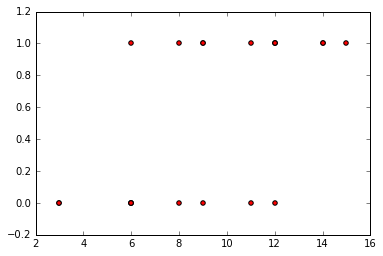

In [5]:
plt.scatter(X, Y, c='r')

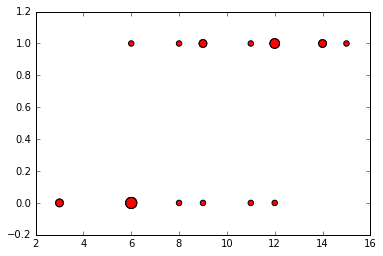

In [6]:
plt.scatter(X, Y, c='r', s=s)

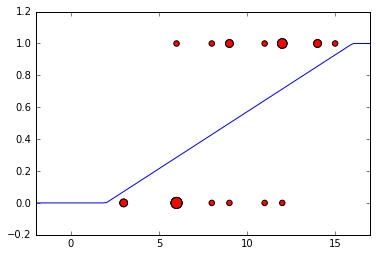

In [7]:
def prob(grade):
    if grade > 16:
        return 1
    if grade < 2:
        return 0
    return 1/14 * grade - 1/7

g = np.linspace(-2, 17, 100)
plt.axis([-2, 17, -0.2, 1.2])
plt.plot(g, list(map(prob, g)))
plt.scatter(X, Y, c='r', s=s)

In [8]:
probX = np.array(list(map(prob, X)))
probX

array([ 0.64285714,  0.42857143,  0.92857143,  0.28571429,  0.5       ,
        0.71428571,  0.28571429,  0.28571429,  0.71428571,  0.5       ,
        0.07142857,  0.85714286,  0.64285714,  0.85714286,  0.28571429,
        0.28571429,  0.42857143,  0.71428571,  0.07142857,  0.5       ,
        0.71428571])

In [9]:
probX >= 0.5

array([ True, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False,  True], dtype=bool)

In [10]:
(probX >= 0.5) * 1

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [11]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [12]:
np.sum((probX >= 0.5) * 1 == Y)

15

In [13]:
len(X)

21

In [14]:
def predictor(boundary):
    return lambda grade: 1 if grade >= boundary else 0

for b in range(0, 16):
    print(b, np.sum(np.array(list(map(predictor(b), X))) == Y))

0 11
1 11
2 11
3 11
4 13
5 13
6 13
7 16
8 16
9 16
10 15
11 15
12 15
13 13
14 13
15 11


In [15]:
pX = np.array(list(map(prob, X)))
pX

array([ 0.64285714,  0.42857143,  0.92857143,  0.28571429,  0.5       ,
        0.71428571,  0.28571429,  0.28571429,  0.71428571,  0.5       ,
        0.07142857,  0.85714286,  0.64285714,  0.85714286,  0.28571429,
        0.28571429,  0.42857143,  0.71428571,  0.07142857,  0.5       ,
        0.71428571])

In [16]:
like = Y * pX + (1 - Y) * (1 - pX)
like

array([ 0.64285714,  0.57142857,  0.92857143,  0.71428571,  0.5       ,
        0.28571429,  0.71428571,  0.71428571,  0.71428571,  0.5       ,
        0.92857143,  0.85714286,  0.35714286,  0.85714286,  0.28571429,
        0.71428571,  0.42857143,  0.71428571,  0.92857143,  0.5       ,
        0.71428571])

In [17]:
np.prod(like)

3.2016337809171925e-05

In [18]:
1 / np.exp2(21)

4.76837158203125e-07

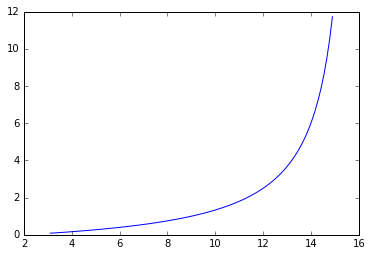

In [19]:
def odds(grade):
    return prob(grade) / (1 - prob(grade))

g = np.linspace(3.1, 14.9, 100)
plt.plot(g, list(map(odds, g)))

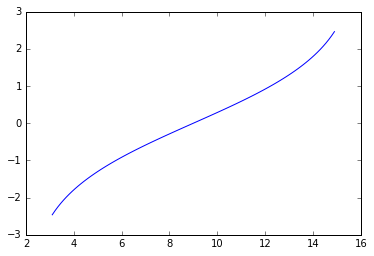

In [20]:
L = np.array(list(map(np.log, map(odds, g))))
plt.plot(g, L)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(lift(g), lift(L))

beta = model.predict([[0]])[0,0]
alpha = model.predict([[1]])[0,0] - beta
alpha, beta

(0.35023091370179049, -3.1520782233161153)

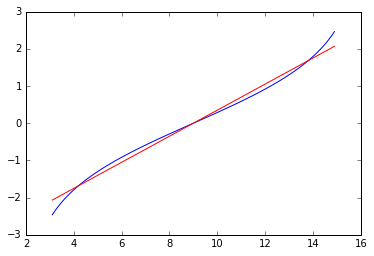

In [22]:
plt.plot(g, L, 'b', g, alpha * g + beta, 'r')

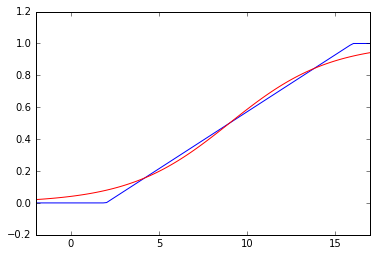

In [23]:
g = np.linspace(-2, 17, 100)
plt.axis([-2, 17, -0.2, 1.2])
plt.plot(g, list(map(prob, g)), 'b',
         g, np.exp(alpha * g + beta) / (1 + np.exp(alpha*g + beta)), 'r')

In [24]:
pX = np.exp(alpha * X + beta) / (1 + np.exp(alpha * X + beta))
pX

array([ 0.66829016,  0.41332643,  0.89103777,  0.2590921 ,  0.5       ,
        0.7409079 ,  0.2590921 ,  0.2590921 ,  0.7409079 ,  0.5       ,
        0.10896223,  0.85209837,  0.66829016,  0.85209837,  0.2590921 ,
        0.2590921 ,  0.41332643,  0.7409079 ,  0.10896223,  0.5       ,
        0.7409079 ])

In [25]:
like = Y * pX + (1 - Y) * (1 - pX)
like

array([ 0.66829016,  0.58667357,  0.89103777,  0.7409079 ,  0.5       ,
        0.2590921 ,  0.7409079 ,  0.7409079 ,  0.7409079 ,  0.5       ,
        0.89103777,  0.85209837,  0.33170984,  0.85209837,  0.2590921 ,
        0.7409079 ,  0.41332643,  0.7409079 ,  0.89103777,  0.5       ,
        0.7409079 ])

In [26]:
np.prod(like)

2.8395456935284211e-05

In [27]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression()
model.fit(lift(X), Y)

model.predict([[4]])

array([0])

In [28]:
predicted = model.predict(lift(X))
predicted

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [29]:
np.sum(predicted * 1 == Y)

16

In [30]:
model.predict_proba(lift(X))

array([[ 0.33544429,  0.66455571],
       [ 0.45978518,  0.54021482],
       [ 0.20096565,  0.79903435],
       [ 0.54663805,  0.45336195],
       [ 0.4169372 ,  0.5830628 ],
       [ 0.29779614,  0.70220386],
       [ 0.54663805,  0.45336195],
       [ 0.54663805,  0.45336195],
       [ 0.29779614,  0.70220386],
       [ 0.4169372 ,  0.5830628 ],
       [ 0.67030203,  0.32969797],
       [ 0.23038862,  0.76961138],
       [ 0.33544429,  0.66455571],
       [ 0.23038862,  0.76961138],
       [ 0.54663805,  0.45336195],
       [ 0.54663805,  0.45336195],
       [ 0.45978518,  0.54021482],
       [ 0.29779614,  0.70220386],
       [ 0.67030203,  0.32969797],
       [ 0.4169372 ,  0.5830628 ],
       [ 0.29779614,  0.70220386]])

In [31]:
predictedProbs = model.predict_proba(lift(X))[:, 1]
np.prod(predictedProbs * Y + (1 - predictedProbs) * (1 - Y))

6.9659002665912252e-06

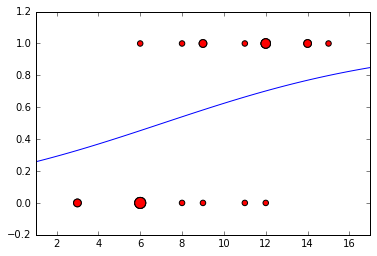

In [32]:
g = np.linspace(-2, 17, 100)
plt.axis([1, 17, -0.2, 1.2])
plt.plot(g, model.predict_proba(lift(g))[:, 1])
plt.scatter(X, Y, c='r', s=s)

In [33]:
%run text.py

In [34]:
txtX[:3]

array([[0, 1],
       [0, 1],
       [4, 0]])

In [35]:
txtY[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

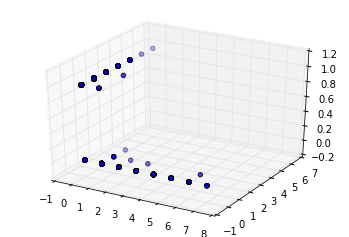

In [36]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(txtX[:, 0], txtX[:, 1], txtY)
plt.show()

In [37]:
model = LogisticRegression()
model.fit(txtX, txtY)

model.predict([[2, 0], [0, 1]])

array([0, 1])

In [38]:
np.sum((model.predict(txtX) == txtY) * 1) / len(txtX)

0.92500000000000004

In [39]:
%run text2.py

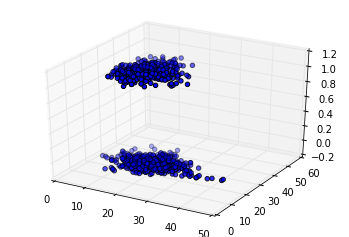

In [40]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(txtX[:, 0], txtX[:, 1], txtY)
plt.show()

In [41]:
model = LogisticRegression()
model.fit(txtX, txtY)
np.sum((model.predict(txtX) == txtY) * 1) / len(txtX)

0.93700000000000006

In [42]:
len(txtX)

1000

In [43]:
model = LogisticRegression()
model.fit(txtX[:600], txtY[:600])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
np.sum((model.predict(txtX[600:]) == txtY[600:]) * 1) / len(txtX[600:])

0.92000000000000004

In [45]:
%run text3.py

In [46]:
txtX[:3]

array([[117,   0,   0,  10],
       [ 39,  16,  46,  57],
       [ 75,  10,  23,  47]])

In [47]:
txtY[:10]

array(['finnish', 'german', 'english', 'italian', 'english', 'german',
       'german', 'english', 'german', 'german'], 
      dtype='<U7')

In [48]:
model = LogisticRegression()
model.fit(txtX[:4000], txtY[:4000])
np.sum((model.predict(txtX[4000:]) == txtY[4000:]) * 1) / len(txtX[4000:])

0.995

In [49]:
model = LogisticRegression()
model.fit(txtX[:4000, :2], txtY[:4000])
np.sum((model.predict(txtX[4000:, :2]) == txtY[4000:]) * 1) / len(txtX[4000:])

0.86699999999999999

In [50]:
from scipy.fftpack import dct

dct([1, 1, 1, 1, 1])

array([ 10.,   0.,   0.,   0.,   0.])

In [51]:
dct([1, .5, 0, -.5, -1])

array([  0.00000000e+00,   4.97979657e+00,  -5.55111512e-17,
         4.49027977e-01,   4.44089210e-16])

In [52]:
np.round(dct([1, .5, 0, -.5, -1]))

array([ 0.,  5., -0.,  0.,  0.])

In [53]:
np.round(dct([1, 0, -1, 0, 1]))

array([ 2., -0.,  5.,  0., -1.])

In [54]:
def DCT2D(arr):
    return dct(dct(arr, axis=0), axis=1)

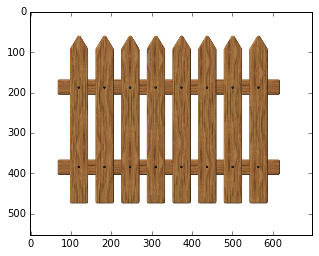

In [56]:
img = Image.open("zaun.jpg")
plt.imshow(img)

In [57]:
d = DCT2D(img.convert("L"))
d

array([[  2.99781712e+08,  -2.02253422e+06,   2.95924707e+07, ...,
         -4.78357688e+04,   5.05338767e+04,   6.87925058e+03],
       [  6.21344051e+04,  -8.65632449e+03,   1.14486970e+05, ...,
          4.86227306e+03,   6.99038566e+02,   5.36773502e+03],
       [  3.23414915e+07,   6.81044948e+05,  -9.93071692e+06, ...,
          1.64101332e+04,  -1.41331250e+04,   3.14704444e+03],
       ..., 
       [ -5.32421069e+04,  -2.59066156e+03,   2.54291842e+04, ...,
          1.32919404e+03,  -7.41435176e+02,  -2.94353686e+02],
       [  4.28201982e+04,  -1.39570230e+03,  -2.38876326e+04, ...,
          5.79660560e+02,  -1.06932206e+03,  -1.26786316e+03],
       [ -1.88222788e+04,  -2.51925833e+03,   1.12932128e+04, ...,
          4.14446213e+02,   5.00109862e+02,  -1.23714939e+03]])

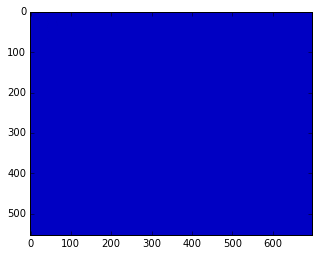

In [58]:
plt.imshow(d)

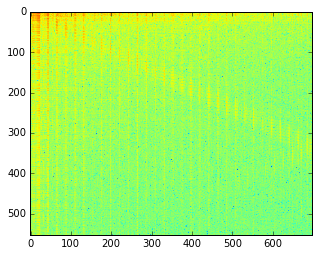

In [59]:
plt.imshow(np.log(np.abs(d)))

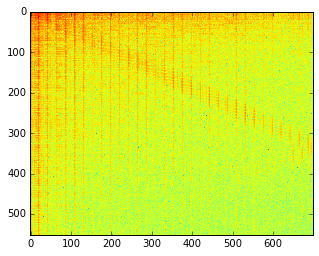

In [60]:
plt.imshow(np.log(np.abs(d))[1:,1:])